### Librerias

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import pandas as pd
import numpy as np
from datetime import datetime,date
from dateutil.relativedelta import relativedelta
import time
from tqdm import tqdm
from dateutil.parser import parse
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt 

### Importación CSV

In [2]:
path = "sharks_clean.csv"
with open(path,encoding="utf8",errors="ignore") as f:
    sharks = pd.read_csv(f)

In [3]:
#homogeneización indice, eliminando columna 'Unnamed:0'
sharks.drop(['Unnamed: 0'],axis=1,inplace=True)

### Hipotesis de trabajo nº01
Estudiar para aquellos paises que haya suficientes muestras a lo largo del tiempo (100 o más) desde el año 1900, si el numero de ataques de tiburones va en aumento o no, y con que velocidad. Comparar la evolución entre los paises elegidos.

In [4]:
#creamos un nuevo dataframe con las columnas que nos interesan
data01=sharks[['year','country']].copy()

#eliminamos las filas que tengan valor nulo en la columna 'year' o en la columna 'country'
data01.dropna(inplace=True)

#nos quedamos solo con las filas del año 1900 o posteriores
data01=data01[data01.year>=1900]

#agrupamos datos por 'country'
data02=data01.groupby(by='country')

#contamos cuantos registros de 'year' hay en cada country, renombramos columna del dataframe como 'year_count'
data02=data02.agg({'year':'count'})
data02.columns=['year_count']

#nos quedamos solo con aquellos registros que el 'year_count'>=100
data02=data02[data02.year_count>=100]

#guardamos los paises que vamos a estudiar en una lista
countries=data02.index.tolist()

#volvemos a utilizar el data01
#nos quedamos solo con los datos que nos interesan, los que estan en la variable countries
data01=data01[data01.country.isin(countries)]

#agrupamos los datos por 'country' y por 'year'
data01=data01.groupby(['country','year'])

#contamos cuantos registros hay por cada 'country' y 'year', renombramos columna del dataframe como 'year_count'
data01=data01.agg({'year':'count'})
data01.columns=['year_count']


data01

year_count
country   year              
AUSTRALIA 1900.0           3
          1901.0           2
          1902.0           3
          1903.0           4
          1904.0           1
...                      ...
USA       2014.0          66
          2015.0          73
          2016.0          64
          2017.0          65
          2018.0          10

[404 rows x 1 columns]

In [5]:
#reseteamos indices para tener toda la información en columnas y no en diferentes levels del indice y facilitar el plot
data01.reset_index(inplace=True)

data01

,country,year,year_count
0,AUSTRALIA,1900.0,3
1,AUSTRALIA,1901.0,2
2,AUSTRALIA,1902.0,3
3,AUSTRALIA,1903.0,4
4,AUSTRALIA,1904.0,1
...,...,...,...
399,USA,2014.0,66
400,USA,2015.0,73
401,USA,2016.0,64
402,USA,2017.0,65


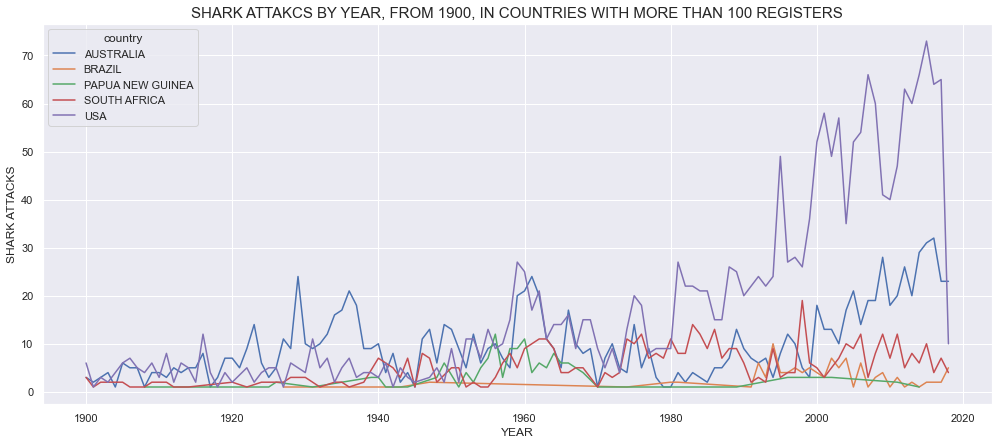

In [6]:
#generamos lineplot para cada pais con seaborn
#con hue le decimos a lineplot como agrupar los valores x-y
sns.set(rc = {'figure.figsize':(17,7)})
g01=sns.lineplot(data=data01, x='year', y='year_count', hue='country', ci=None, palette='deep', linewidth = 1.5)
g01.set_title('SHARK ATTAKCS BY YEAR, FROM 1900, IN COUNTRIES WITH MORE THAN 100 REGISTERS', fontsize = 15)
g01.set_xlabel("YEAR", fontsize = 12)
g01.set_ylabel("SHARK ATTACKS", fontsize = 12)
plt.show()

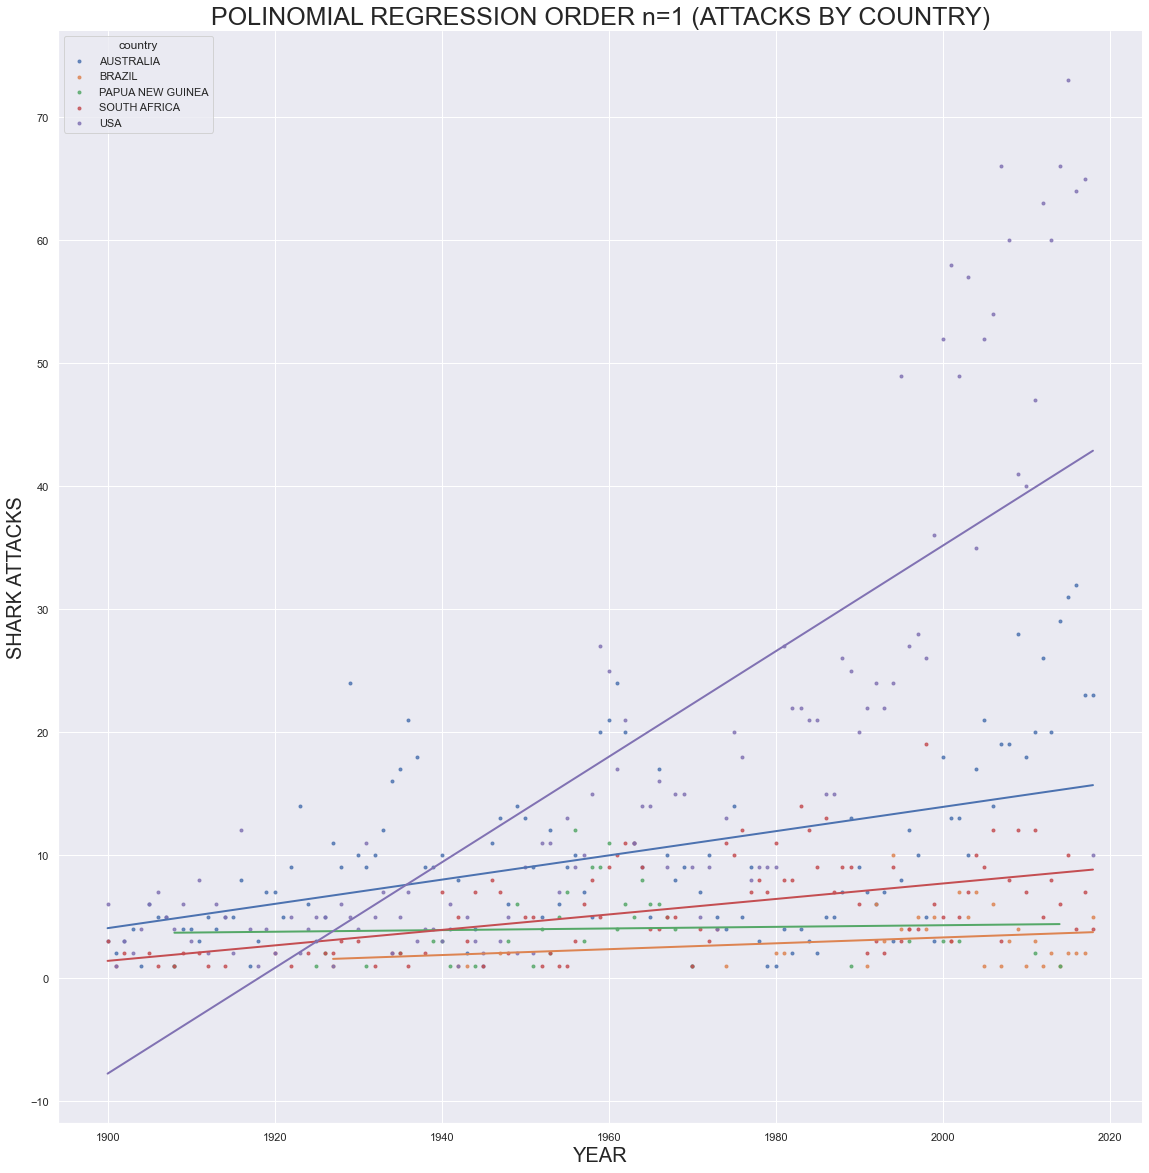

In [8]:
#generamos modelo de regresion polinomial orden 1 para entender un poco mejor las tendencias de los datos
g02=sns.lmplot(data=data01, x='year', y='year_count', hue='country',height=16,aspect=1,markers='.',facet_kws={'legend_out':False},palette='deep', order=1,ci=None,line_kws={"lw":2})
plt.title('POLINOMIAL REGRESSION ORDER n=1 (ATTACKS BY COUNTRY)', fontsize = 25)
plt.xlabel('YEAR',fontsize = 20)
plt.ylabel('SHARK ATTACKS',fontsize = 20)
plt.show()

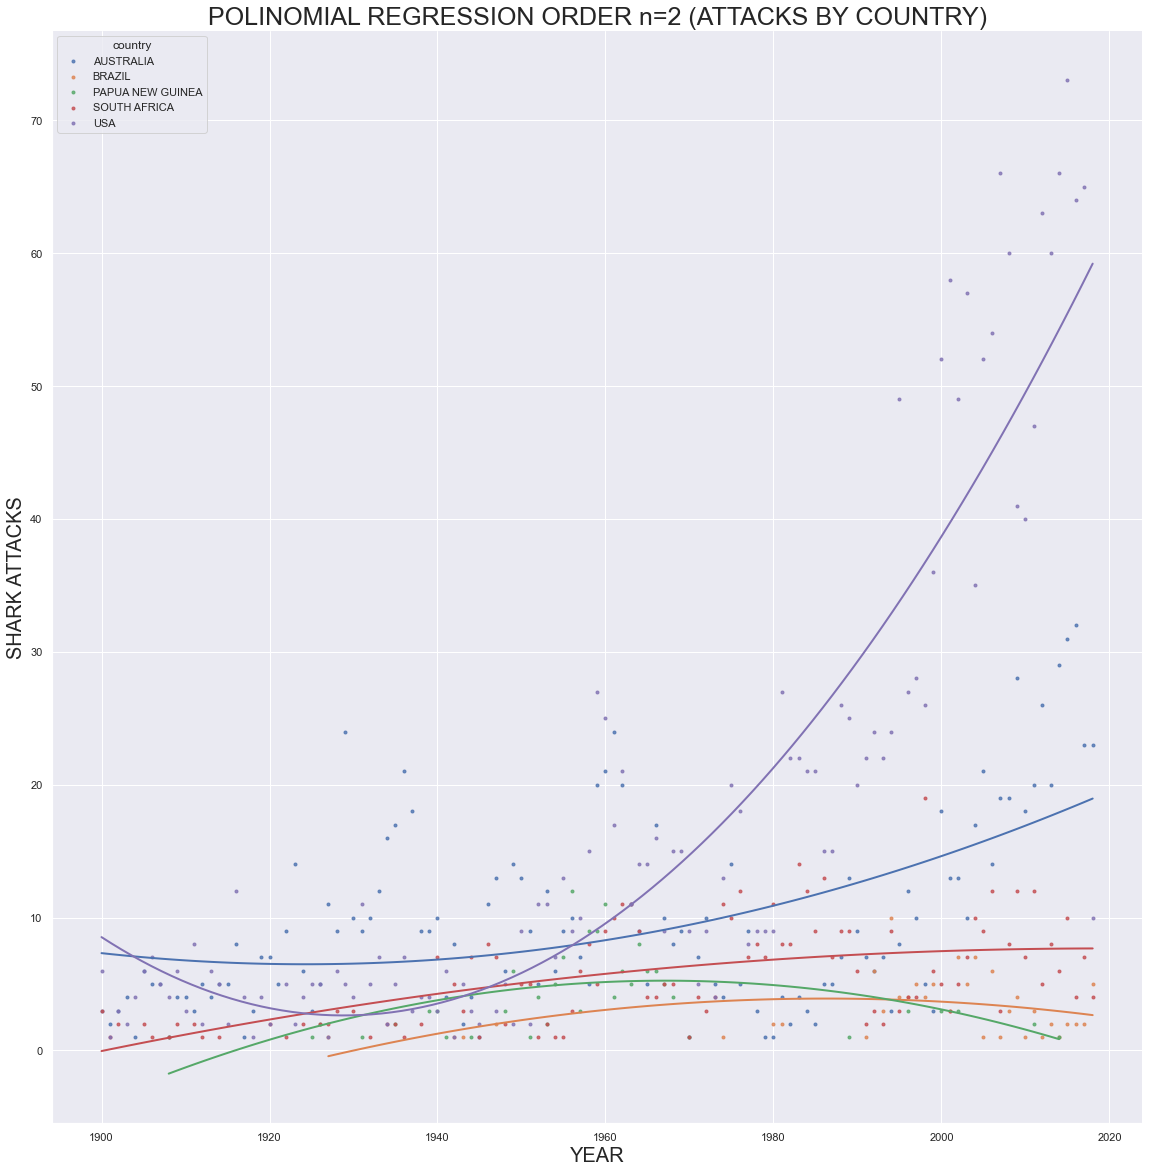

In [10]:
#probamos con uno de orden 2
g03=sns.lmplot(data=data01, x='year', y='year_count', hue='country',height=16,aspect=1,markers='.',facet_kws={'legend_out':False},palette='deep', order=2,ci=None,line_kws={"lw":2})
plt.title('POLINOMIAL REGRESSION ORDER n=2 (ATTACKS BY COUNTRY)', fontsize = 25)
plt.xlabel('YEAR',fontsize = 20)
plt.ylabel('SHARK ATTACKS',fontsize = 20)
plt.show()

In [11]:
#podemos hacer el mismo estudio, pero solo centrandonos en los incidentes con resultado fatal

In [12]:
#creamos un nuevo dataframe con las columnas que nos interesan
data03=sharks[['year','country','fatal']].copy()

#eliminamos las filas que tengan valor nulo en la columna 'year' o en la columna 'country' o 'fatal'
data03.dropna(inplace=True)

#nos quedamos solo con las filas del año 1900 o posteriores
data03=data03[data03.year>=1900]

#nos quedamos solo con los datos que nos interesan, los que estan en la variable countries que ya hemos generado antes
data03=data03[data03.country.isin(countries)]

#y ademas que fatal sea Y
data03=data03[data03.fatal.str.contains('Y')]

#agrupamos los datos por 'country' y por 'year'
data03=data03.groupby(['country','year'])

#contamos cuantos registros hay por cada 'country' y 'year', renombramos columna del dataframe como 'year_count'
data03=data03.agg({'year':'count'})
data03.columns=['year_count']

data03

year_count
country   year              
AUSTRALIA 1900.0           1
          1901.0           1
          1902.0           2
          1903.0           4
          1904.0           1
...                      ...
USA       2009.0           2
          2010.0           2
          2012.0           1
          2013.0           2
          2015.0           1

[275 rows x 1 columns]

In [13]:
#reseteamos indices para tener toda la información en columnas y no en diferentes levels del indice y facilitar el plot
data03.reset_index(inplace=True)

data03

,country,year,year_count
0,AUSTRALIA,1900.0,1
1,AUSTRALIA,1901.0,1
2,AUSTRALIA,1902.0,2
3,AUSTRALIA,1903.0,4
4,AUSTRALIA,1904.0,1
...,...,...,...
270,USA,2009.0,2
271,USA,2010.0,2
272,USA,2012.0,1
273,USA,2013.0,2


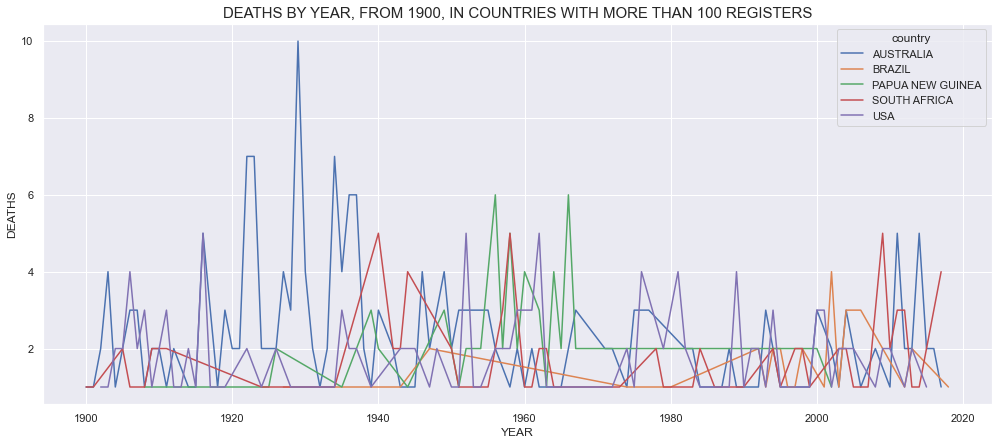

In [14]:
#generamos lineplot para cada pais con seaborn
#con hue le decimos a lineplot como agrupar los valores x-y
sns.set(rc = {'figure.figsize':(17,7)})
g04=sns.lineplot(data=data03, x='year', y='year_count', hue='country', ci=None, palette='deep', linewidth = 1.5)
g04.set_title('DEATHS BY YEAR, FROM 1900, IN COUNTRIES WITH MORE THAN 100 REGISTERS', fontsize = 15)
g04.set_xlabel("YEAR", fontsize = 12)
g04.set_ylabel("DEATHS", fontsize = 12)
plt.show()

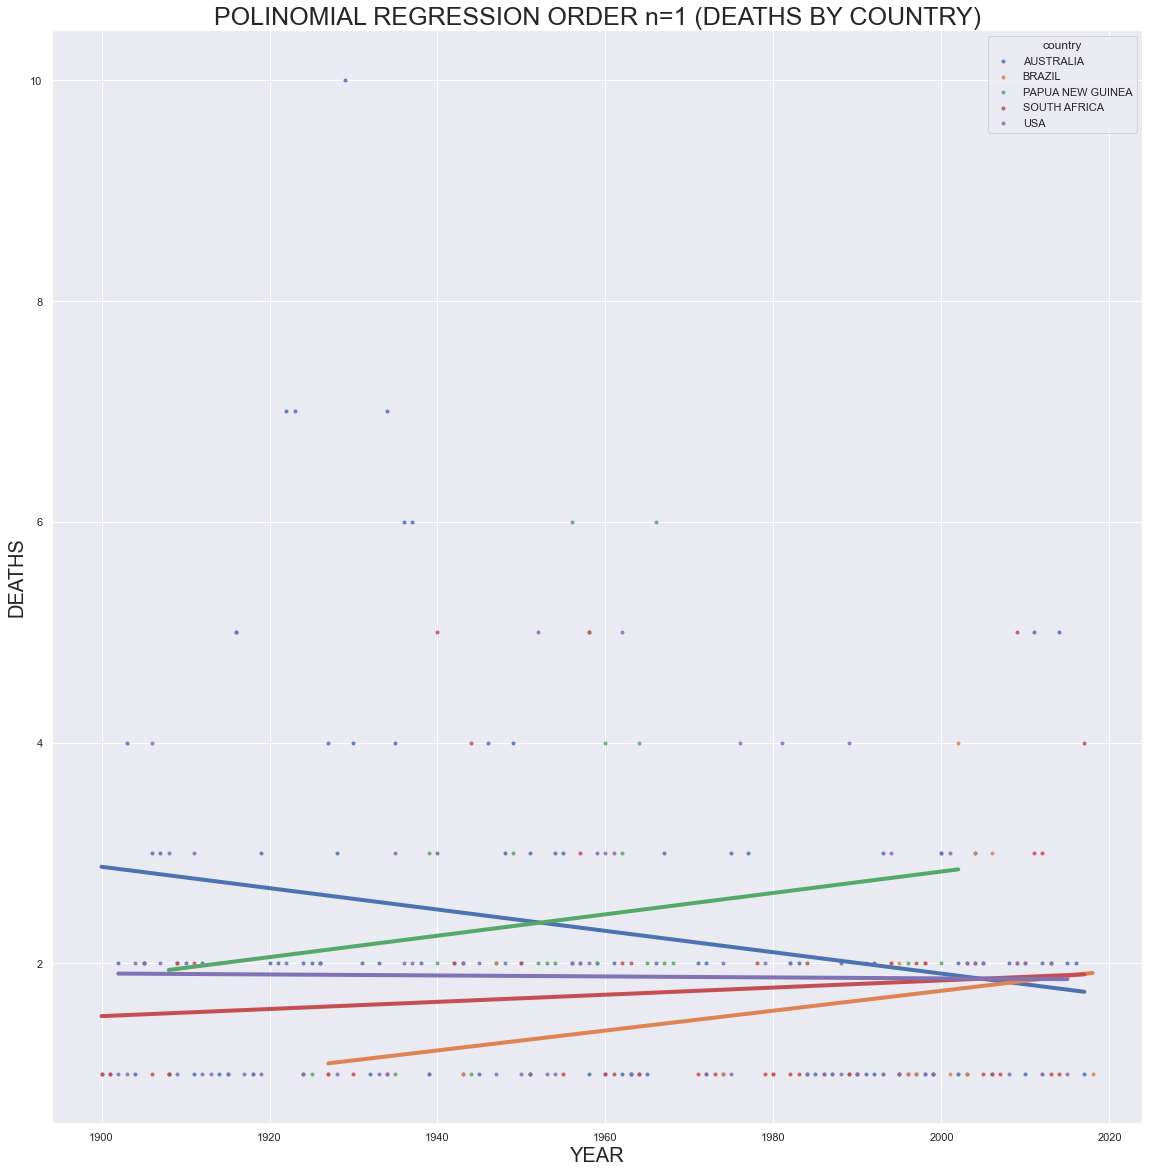

In [15]:
#checkeo rápido a las regresiones polinómicas de orden 1 referente a muertes
g05=sns.lmplot(data=data03, x='year', y='year_count', hue='country',height=16,aspect=1,markers='.',facet_kws={'legend_out':False},palette='deep', order=1,ci=None,line_kws={"lw":4})
plt.title('POLINOMIAL REGRESSION ORDER n=1 (DEATHS BY COUNTRY)', fontsize = 25)
plt.xlabel('YEAR',fontsize = 20)
plt.ylabel('DEATHS',fontsize = 20)
plt.show()

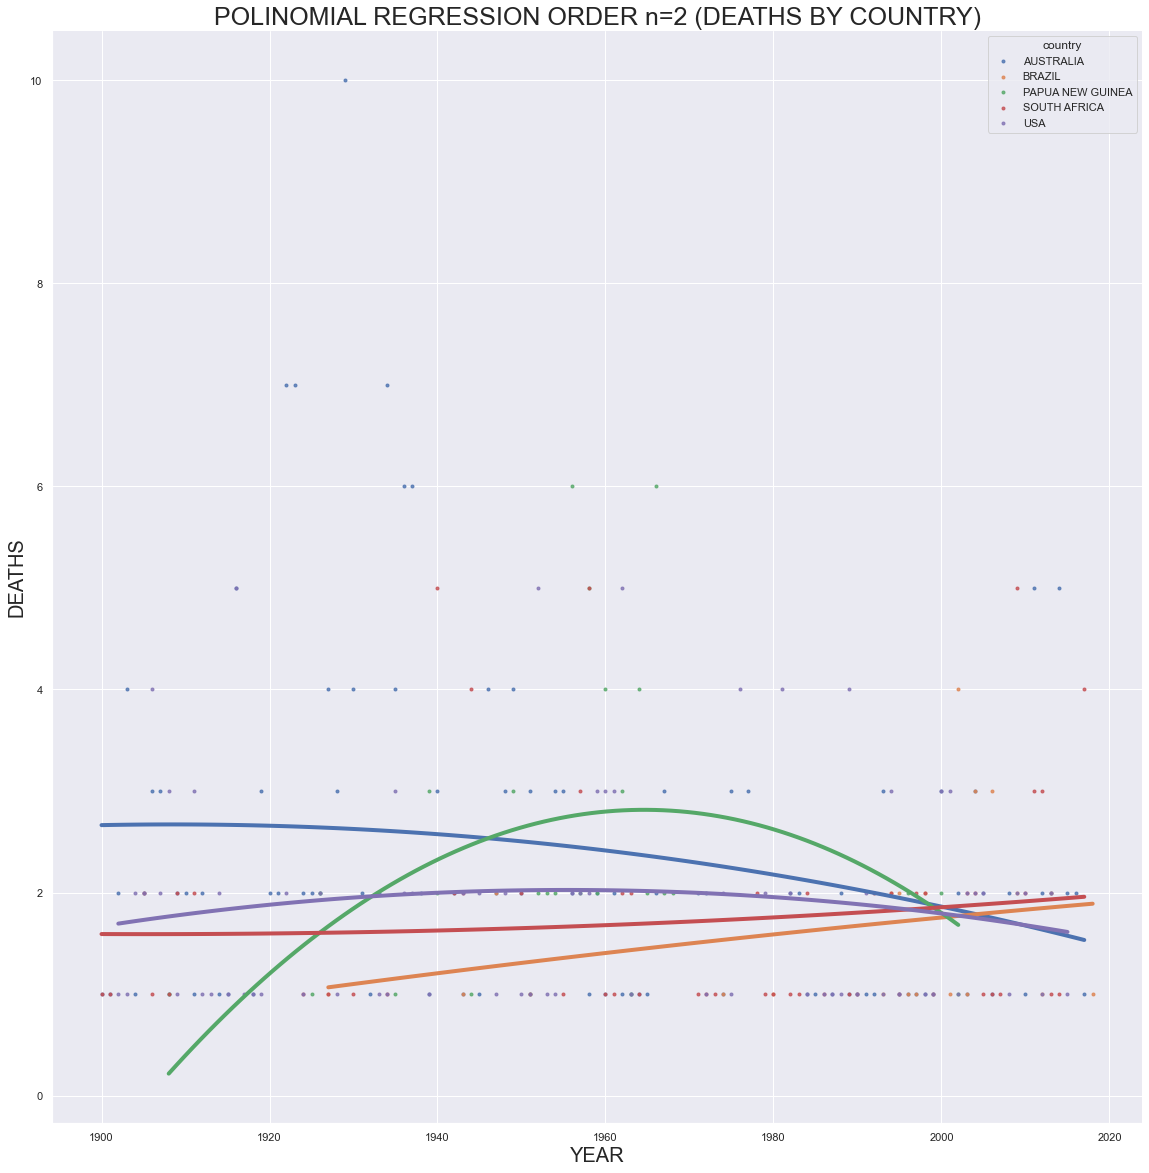

In [16]:
#checkeo rápido a las regresiones polinómicas de orden 2 referente a muertes
g06=sns.lmplot(data=data03, x='year', y='year_count', hue='country',height=16,aspect=1,markers='.',facet_kws={'legend_out':False},palette='deep', order=2,ci=None,line_kws={"lw":4})
plt.title('POLINOMIAL REGRESSION ORDER n=2 (DEATHS BY COUNTRY)', fontsize = 25)
plt.xlabel('YEAR',fontsize = 20)
plt.ylabel('DEATHS',fontsize = 20)
plt.show()